# CelebA

In this notebook we show the results for CelebA. You can create from scratch the features or use the pre-computed ones.

### 1. Create feature

If you want to create the features, first of all unzip file "dataset_celebA.7z ". Be sure to save the folder together with this notebook. You also need to download  [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

### Otherwise, just jump to section 2.

In [1]:
# import cv2
# import numpy as np
# import os
# import radialProfile
# import glob
# from matplotlib import pyplot as plt
# import pickle
# from scipy.interpolate import griddata
# 
# data = {}
# epsilon = 1e-8
# N = 80
# y = []
# error = []
# 
# number_iter = 1000
# 
# psd1D_total = np.zeros([number_iter, N])
# label_total = np.zeros([number_iter])
# psd1D_org_mean = np.zeros(N)
# psd1D_org_std = np.zeros(N)
# 
# cont = 0
# 
# # fake data
# rootdir = 'dataset_celebA/'
# 
# for filename in glob.glob(rootdir + "*.jpg"):
#     img = cv2.imread(filename, 0)
# 
#     f = np.fft.fft2(img)
#     fshift = np.fft.fftshift(f)
#     fshift += epsilon
# 
#     magnitude_spectrum = 20 * np.log(np.abs(fshift))
#     psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
# 
#     # Calculate the azimuthally averaged 1D power spectrum
#     points = np.linspace(0, N, num=psd1D.size)  # coordinates of a
#     xi = np.linspace(0, N, num=N)  # coordinates for interpolation
# 
#     interpolated = griddata(points, psd1D, xi, method='cubic')
#     interpolated /= interpolated[0]
# 
#     psd1D_total[cont, :] = interpolated
#     label_total[cont] = 1
#     cont += 1
# 
#     if cont == number_iter:
#         break
# 
# for x in range(N):
#     psd1D_org_mean[x] = np.mean(psd1D_total[:, x])
#     psd1D_org_std[x] = np.std(psd1D_total[:, x])
# 
# ## real data
# psd1D_total2 = np.zeros([number_iter, N])
# label_total2 = np.zeros([number_iter])
# psd1D_org_mean2 = np.zeros(N)
# psd1D_org_std2 = np.zeros(N)
# 
# cont = 0
# rootdir2 = '/home/duralllopez/DATASETS/celebA/img_align_celeba/'
# 
# for filename in glob.glob(rootdir2 + "*.jpg"):
#     img = cv2.imread(filename, 0)
# 
#     f = np.fft.fft2(img)
#     fshift = np.fft.fftshift(f)
#     fshift += epsilon
# 
#     magnitude_spectrum = 20 * np.log(np.abs(fshift))
# 
#     # Calculate the azimuthally averaged 1D power spectrum
#     psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
# 
#     points = np.linspace(0, N, num=psd1D.size)  # coordinates of a
#     xi = np.linspace(0, N, num=N)  # coordinates for interpolation
# 
#     interpolated = griddata(points, psd1D, xi, method='cubic')
# 
#     interpolated /= interpolated[0]
# 
#     psd1D_total2[cont, :] = interpolated
#     label_total2[cont] = 0
#     cont += 1
# 
#     if cont == number_iter:
#         break
# 
# for x in range(N):
#     psd1D_org_mean2[x] = np.mean(psd1D_total2[:, x])
#     psd1D_org_std2[x] = np.std(psd1D_total2[:, x])
# 
# y.append(psd1D_org_mean)
# y.append(psd1D_org_mean2)
# error.append(psd1D_org_std)
# error.append(psd1D_org_std2)
# 
# psd1D_total_final = np.concatenate((psd1D_total, psd1D_total2), axis=0)
# label_total_final = np.concatenate((label_total, label_total2), axis=0)
# 
# data["data"] = psd1D_total_final
# data["label"] = label_total_final
# 
# output = open('celeba_low_1000.pkl', 'wb')
# pickle.dump(data, output)
# output.close()
# 
# print("DATA Saved") 

DATA Saved


### 2. Loading Features

Now, we load the features. Either the pre-computed ones or the features that you have created.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file = open('celeba_low_1000.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

We look at the label distribution, to be sure that we have a balanced dataset.

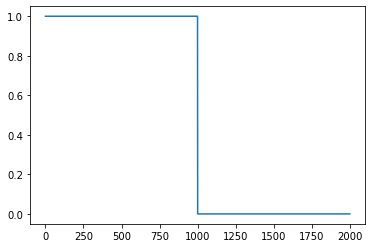

In [2]:
plt.plot(y)

### Plot of  celeba_low_1000.pkl in R

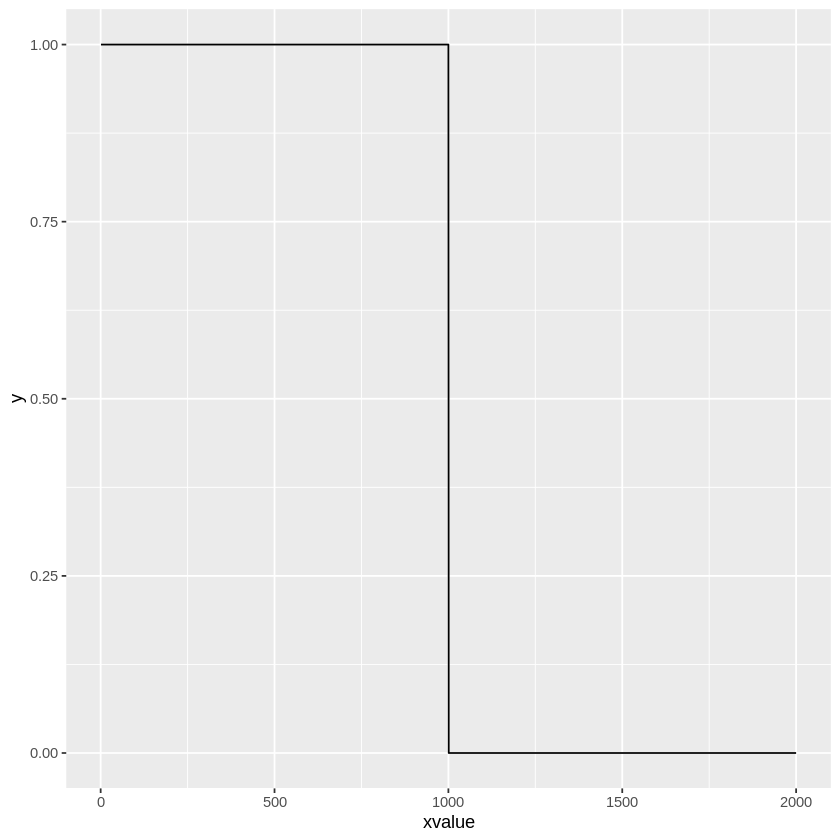

In [3]:
%use R
%get y --from Python3
# Libraries
library(ggplot2)

# create data
xvalue <- 1:2000
yvalue <- cumsum(rnorm(10))
data <- data.frame(xvalue,y)

#print(y)
# Plot
ggplot(data, aes(x=xvalue, y=y)) + geom_line()

### 3. Check Spectrum

We have a look to the spectrum

Text(0, 0.5, 'Power Spectrum')

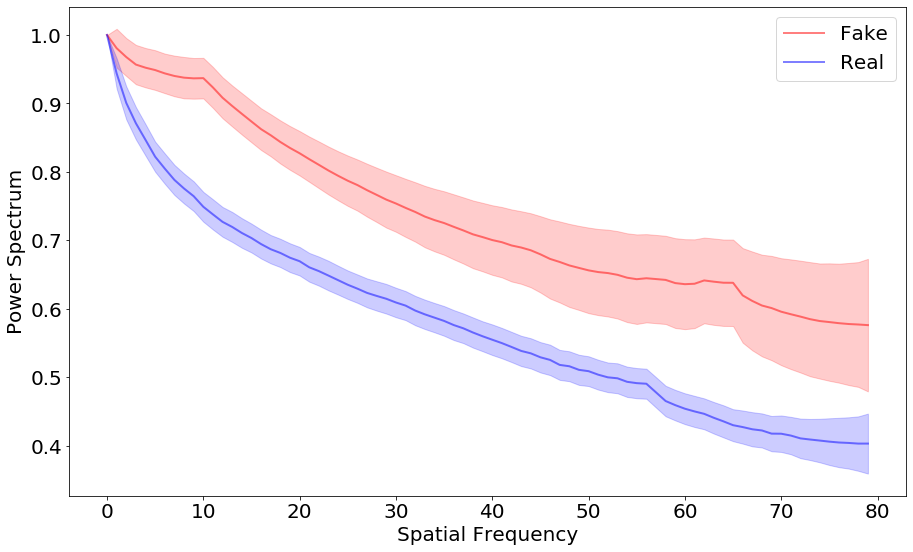

In [15]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)
#plt.savefig('1000_celeba.png', bbox_inches='tight')

### Check Spectrum with Python, R and SOS

In [30]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

In [31]:
%use R
%get num_feat --from Python3
%get psd1D_org_0 --from Python3
%get psd1D_org_1 --from Python3
%get psd1D_org_0_mean --from Python3
%get psd1D_org_0_std --from Python3
%get psd1D_org_1_mean --from Python3
%get psd1D_org_1_std --from Python3

for (x in (0:num_feat)){
    psd1D_org_0_mean[x] = mean(psd1D_org_0[(0:1000),x])
    psd1D_org_0_std[x] = sd(psd1D_org_0[(0:1000),x])
    psd1D_org_1_mean[x] = mean(psd1D_org_1[(0:1000),x])
    psd1D_org_1_std[x] = sd(psd1D_org_1[(0:1000),x])
}

Text(0, 0.5, 'Power Spectrum')

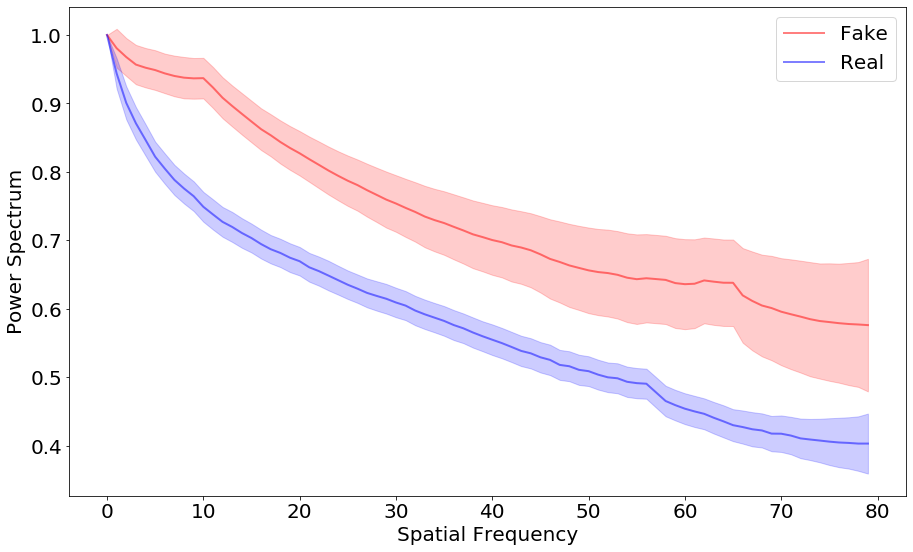

In [32]:
%get num_feat --from R
%get psd1D_org_0 --from R
%get psd1D_org_1 --from R
%get psd1D_org_0_mean --from R
%get psd1D_org_0_std --from R
%get psd1D_org_1_mean --from R
%get psd1D_org_1_std --from R

# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)
#plt.savefig('1000_celeba.png', bbox_inches='tight')

### 4. Classification

Now we classify using the features.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

num = 10
LR = 0
SVM = 0
SVM_r = 0
SVM_p = 0


for z in range(num):
    # read python dict back from the file
    pkl_file = open('celeba_low_1000.pkl', 'rb')
    
    data = pickle.load(pkl_file)

    pkl_file.close()
    X = data["data"]
    y = data["label"]


    try:

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='linear')
        svclassifier.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
               
        from sklearn.svm import SVC
        svclassifier_r = SVC(C=6.37, kernel='rbf', gamma=0.86)
        svclassifier_r.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier_r.score(X_test, y_test)))
                
        from sklearn.svm import SVC
        svclassifier_p = SVC(kernel='poly')
        svclassifier_p.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier_p.score(X_test, y_test)))
        
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=1000)
        logreg.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

        
        SVM+=svclassifier.score(X_test, y_test)
        SVM_r+=svclassifier_r.score(X_test, y_test)
        SVM_p+=svclassifier_p.score(X_test, y_test)
        LR+=logreg.score(X_test, y_test)

        
    except:
        num-=1
        print(num)
    
print("Average SVM: "+str(SVM/num))
print("Average SVM_r: "+str(SVM_r/num))
print("Average SVM_p: "+str(SVM_p/num))
print("Average LR: "+str(LR/num))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarni

Average SVM: 0.9995
Average SVM_r: 1.0
Average SVM_p: 0.9855
Average LR: 0.9975000000000002


/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
